# Example Jupyter Notebook: Loading and Exploring .braidz files
The 3D trajectories are stored in ".braidz" files. We will load them using pandas.


First download the data: https://drive.google.com/file/d/1KorbeaTAacygk9zLB6wqW_0xPvnJneg9/view?usp=sharing

And put the .braidz file in the same directory as this notebook

# Import packages (for loading braidz file)

In [1]:
import zipfile
import urllib.request # requires Python 3 # 
import pandas as pd

# Import packages (for analyzing braidz file)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Some helper functions for loading braidz files

In [4]:
def open_filename_or_url(filename_or_url):
    parsed = urllib.parse.urlparse(filename_or_url)
    if parsed.scheme=='':
        # no scheme, so this is a filename.
        fileobj_with_seek = open(filename_or_url,mode='rb')
    else:
        # Idea for one day: implement HTTP file object reader that implements
        # seek using HTTP range requests.
        fileobj = urllib.request.urlopen(filename_or_url)
        fileobj_with_seek = io.BytesIO(fileobj.read())
    return fileobj_with_seek

def load_filename_as_dataframe(filename_or_url):
    fileobj = open_filename_or_url(filename_or_url)

    with zipfile.ZipFile(file=fileobj, mode='r') as archive:
        df = pd.read_csv(
            archive.open('kalman_estimates.csv.gz'),
            comment="#",
            compression='gzip')
    return df

# Load the data as a pandas dataframes

In [9]:
braid_file = '20200210_145115.braidz' 
df = load_filename_as_dataframe(braid_file)

# Look at the dataframe

In [10]:
df

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,P01,P02,P11,P12,P22,P33,P44,P55
0,9,37238,1.581375e+09,0.026626,0.104981,0.015928,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.010000,1.000000,1.000000,1.000000
1,9,37239,1.581375e+09,0.026617,0.104996,0.015731,-0.000009,0.000015,-0.000195,1.166266e-07,-2.197022e-09,-5.152194e-08,1.343769e-07,4.141463e-07,0.000007,0.991089,0.991089,0.991096
2,9,37240,1.581375e+09,0.026618,0.104998,0.015682,0.000123,0.000161,-0.004590,1.165527e-07,-1.998110e-09,-4.828106e-08,1.327752e-07,3.889518e-07,0.000006,0.002661,0.002954,0.121123
3,9,37241,1.581375e+09,0.026327,0.105220,0.015691,-0.019357,0.014963,-0.001499,2.149360e-07,1.310021e-07,1.008258e-06,4.905123e-07,2.595891e-06,0.000020,0.001741,0.002855,0.084689
4,9,37242,1.581375e+09,0.026529,0.105054,0.015669,0.002305,-0.002513,-0.001453,9.671999e-08,2.160214e-09,1.795276e-08,1.199729e-07,4.031013e-07,0.000006,0.001101,0.001124,0.015119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259887,4719,8831034,1.581463e+09,-0.003606,0.109169,0.044666,-0.240491,0.173520,0.269508,8.367973e-08,7.998455e-09,1.156624e-07,8.001253e-08,1.204539e-07,0.000002,0.001056,0.001036,0.003479
259888,4719,8831035,1.581463e+09,-0.006150,0.111373,0.046123,-0.247201,0.207170,0.238441,8.407229e-08,8.157626e-09,1.247492e-07,7.795629e-08,1.074965e-07,0.000002,0.001050,0.001027,0.003524
259889,4719,8831036,1.581463e+09,-0.008726,0.113872,0.047247,-0.251362,0.237938,0.205284,8.481259e-08,8.110698e-09,1.349947e-07,7.608834e-08,9.525202e-08,0.000002,0.001048,0.001021,0.003514
259890,4719,8831037,1.581463e+09,-0.011290,0.116668,0.047970,-0.251640,0.267899,0.169642,8.581889e-08,7.870272e-09,1.459885e-07,7.434308e-08,8.248479e-08,0.000002,0.001047,0.001016,0.003471


# Introduction to pandas
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

### For our data:
* Rows are the data corresponding to one frame, of one trajectory
* Columns are the different types of information associated with that row

### Let's start with grabbing all the rows corresponding to one trajectory

In [18]:
# Each trajectory gets a unique object id number:
all_obj_ids = df.obj_id.unique()
print(all_obj_ids)

[   9   10   11 ... 4718 4719 4720]


In [33]:
# Get all the rows corresponding to one object id
# There are three equivalent syntaxes. Learn them all.
obj_id = 9

In [ ]:
# Syntax option 1: simplest
trajec = df[df.obj_id==obj_id]

In [29]:
# Syntax option 2: more flexible, since column_name can be a variable
column_name = 'obj_id'
trajec = df[df[column_name]==obj_id]

In [30]:
# Syntax option 3: most flexible, you can add as many constraints to "query" as you wish
query = 'obj_id' + '==' + str(obj_id)
trajec = df.query(query)

In [31]:
trajec

,obj_id,frame,timestamp,x,y,z,xvel,yvel,zvel,P00,P01,P02,P11,P12,P22,P33,P44,P55
0,9,37238,1.581375e+09,0.026626,0.104981,0.015928,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.010000,1.000000,1.000000,1.000000
1,9,37239,1.581375e+09,0.026617,0.104996,0.015731,-0.000009,0.000015,-0.000195,1.166266e-07,-2.197022e-09,-5.152194e-08,1.343769e-07,4.141463e-07,0.000007,0.991089,0.991089,0.991096
2,9,37240,1.581375e+09,0.026618,0.104998,0.015682,0.000123,0.000161,-0.004590,1.165527e-07,-1.998110e-09,-4.828106e-08,1.327752e-07,3.889518e-07,0.000006,0.002661,0.002954,0.121123
3,9,37241,1.581375e+09,0.026327,0.105220,0.015691,-0.019357,0.014963,-0.001499,2.149360e-07,1.310021e-07,1.008258e-06,4.905123e-07,2.595891e-06,0.000020,0.001741,0.002855,0.084689
4,9,37242,1.581375e+09,0.026529,0.105054,0.015669,0.002305,-0.002513,-0.001453,9.671999e-08,2.160214e-09,1.795276e-08,1.199729e-07,4.031013e-07,0.000006,0.001101,0.001124,0.015119
5,9,37243,1.581375e+09,0.026583,0.105033,0.015719,0.004152,-0.002377,0.000602,8.720414e-08,-9.931676e-10,-2.659483e-08,9.858288e-08,2.646012e-07,0.000004,0.001121,0.001127,0.008224
6,9,37244,1.581375e+09,0.026622,0.105013,0.015738,0.004037,-0.002188,0.000979,8.687004e-08,-1.105643e-09,-2.871311e-08,9.523062e-08,2.200078e-07,0.000004,0.001101,0.001098,0.005708
7,9,37245,1.581375e+09,0.026623,0.105008,0.015749,0.001503,-0.001092,0.000942,8.687122e-08,-9.079133e-10,-2.534796e-08,9.397100e-08,1.978266e-07,0.000003,0.001087,0.001080,0.004592
8,9,37246,1.581375e+09,0.026634,0.104998,0.015768,0.001262,-0.001097,0.001177,8.672927e-08,-7.629517e-10,-2.281451e-08,9.299959e-08,1.831470e-07,0.000003,0.001084,0.001074,0.004067
9,9,37247,1.581375e+09,0.026653,0.105001,0.015813,0.001689,-0.000251,0.001962,8.666325e-08,-6.885346e-10,-2.154125e-08,9.234080e-08,1.731107e-07,0.000003,0.001084,0.001073,0.003819


In [34]:
# wrap the pandas syntax into a function for readability
def get_trajec_from_dataframe(df, obj_id):
    trajec = df[df.obj_id==obj_id]
    return trajec

# Plot a trajectory

Text(0, 0.5, 'y')

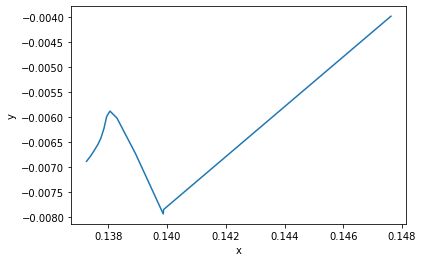

In [35]:
obj_id = 288 # this is the unique id for a trajectory in the dataframe
trajec = get_trajec_from_dataframe(df, obj_id)
plt.plot(trajec.x, trajec.y)

plt.xlabel('x')
plt.ylabel('y')

# Select "good" trajectories
This depends on the analysis, but generally, we will avoid trajectories that are short, spend ANY time on the ceiling, or ANY time on the floor

In [36]:
def filter_trajecs(df, 
                   min_length=50,   # 50 frames = 0.5 seconds
                   max_z_speed=0.3, # shouldn't be flying up/down a lot 
                   min_speed=0.05,  # should be flying (not wallking)
                  ):
    selected_obj_ids = []
    
    for obj_id, gdf in df.groupby('obj_id'):
        if len(gdf) > min_length:
            speed = np.linalg.norm(np.vstack([gdf.zvel, gdf.xvel, gdf.yvel]), axis=0)

            if gdf.z.min() > 0.05: # not on floor
                if gdf.z.max() < 0.5: # not on ceiling
                    if np.max(np.abs(gdf.zvel)) < max_z_speed:
                        if np.min(speed[5:]) > min_speed: # first few frames are off
                            selected_obj_ids.append(obj_id)
    
    return df.loc[df['obj_id'].isin(selected_obj_ids)]

### How many trajectories do we have?

In [39]:
print('There are ', len(df.obj_id.unique()), ' trajectories' )

There are  4712  trajectories


### Filter them

In [41]:
gdf = filter_trajecs(df)

In [42]:
print('There are now ', len(gdf.obj_id.unique()), ' trajectories after filtering' )

There are now  172  trajectories after filtering


### Define new variable for their object ids

In [43]:
selected_objids = gdf.obj_id.unique()
print(selected_objids)

[  35  269  345  396  402  427  443  542  589  590  611  686  782  849
  857 1034 1040 1044 1045 1052 1075 1142 1159 1162 1164 1166 1171 1172
 1178 1182 1186 1218 1245 1246 1250 1436 1450 1451 1452 1456 1457 1534
 1541 1545 1549 1571 1691 1696 1721 1743 1751 1752 1767 1769 1772 1899
 1900 1907 1995 1997 2037 2124 2137 2187 2203 2204 2210 2214 2220 2224
 2227 2259 2268 2270 2272 2275 2291 2309 2311 2319 2321 2327 2331 2353
 2355 2358 2360 2362 2369 2374 2376 2383 2389 2392 2404 2408 2410 2412
 2416 2421 2423 2437 2457 2458 2464 2466 2467 2473 2476 2479 2493 2495
 2503 2512 2521 2541 2549 2551 2556 2584 2591 2597 2615 2617 2638 2643
 2649 2691 2705 2711 2750 2756 2759 2778 2781 2784 2808 2818 2952 2988
 2991 2994 3007 3009 3022 3027 3058 3062 3126 3131 3142 3152 3154 3163
 3395 3407 3408 3556 3563 3572 3576 3585 3596 3606 3649 3686 3773 3808
 3810 3813 3879 4458]


# Exercises
Matplotlib examples: https://matplotlib.org/3.1.1/gallery/index.html


Get familiar with matplotlib, pandas, and the data.


You will probably want to have some basic python under your belt before you do this!

### Plot the 20 longest trajectories from gdf, in a 4x5 grid.

### Make a heatmap of where the flies spent their time in the x-y, x-z, y-z dimensions.
Which colormap do you like? Try viridis, magma, hot, and bone.

### What is the mean speed of the flies, and standard deviation? 

Recall: Speed is the 2-norm of the 3-component velocity


Take a look at the first entry in the velocity column for each trajectory. That's an artifact from the filtering. What is the mean speed of the flies if you ignore that first entry?

### Plot the x-y trajectories for each fly in gdf that are moving in the positive x-direction. 

### Make a histogram of the flies' angular velocity about the z-axis 
You'll need to calculate the heading, and then the change in the heading. The heading is the angle defined by the velocity. The angular velocity about the z-axis corresponds to the turning behavior in the x-y plane. 